In [ ]:
# https://twitter.com/prossertj/status/1253982006855204864
# welfare chauvinism in Labour's remaining vote



In [1]:
dataset_name = "W19_comb"
df_list = [ "BES_Panel", "BES_reduced_with_na"]

In [2]:
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

%matplotlib inline

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re

sns.set();
sns.set_palette("colorblind")

from IPython.display import display, display_html, HTML
from IPython.core.debugger import set_trace
# plt.rcParams["axes.grid"] = False

import Jupyter_module_loader
from utility import *
import gaussian_kde

import warnings
warnings.filterwarnings('ignore')

import holoviews as hv
from holoviews import opts

encoding = "ISO-8859-1"

# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
# %matplotlib inline
(BES_code_folder, BES_small_data_files, BES_data_folder,
 BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()

global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
data_subfolder = BES_data_folder + dataset_name + os.sep

(manifest, dataset_filename, dataset_description, dataset_citation,
 dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

for df in df_list:
    if df=="BES_Panel":
        globals()[df]  = pd.read_pickle(data_subfolder + dataset_filename.replace('.dta','.zip'),compression='zip')
    else:
        globals()[df]  = pd.read_pickle(data_subfolder + df + '.zip',compression='zip' )
        globals()[df].replace(-1,np.nan,inplace=True)
  
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_values"+".csv")
pan_dataset_ages = pd.read_csv( BES_small_data_files + "pan_dataset_ages"+".csv" )

Toggle code

var_type (7911, 14)


In [11]:
welfare_pref = BES_Panel[search(BES_Panel,"welfarePref").index].fillna(method='ffill',axis=1)[search(BES_Panel,"welfarePref").index[-1]]

In [10]:
search(BES_Panel,"welfarePref").index[-1]

'welfarePreferenceW17'

In [4]:
BES_Panel["incomeWelfareW3"]

0         NaN
1        1200
2         NaN
3         NaN
4         NaN
         ... 
97153     NaN
97154     NaN
97155     NaN
97156     NaN
97157     NaN
Name: incomeWelfareW3, Length: 97158, dtype: category
Categories (140, object): [Don't know < 0 < 5 < 15 ... 40000 < 43000 < 50000 < 100000]

In [6]:
BES_Panel["welfarePreferenceExpW2"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
97153    NaN
97154    NaN
97155    NaN
97156    NaN
97157    NaN
Name: welfarePreferenceExpW2, Length: 97158, dtype: category
Categories (6, object): [Much too high < Too high < About right < Too low < Much too low < Don't know]

In [13]:
welfare_pref.value_counts()

About right      12357
Too high         10741
Don't know       10459
Too low          10106
Much too high     4372
Much too low      3941
Name: welfarePreferenceW17, dtype: int64

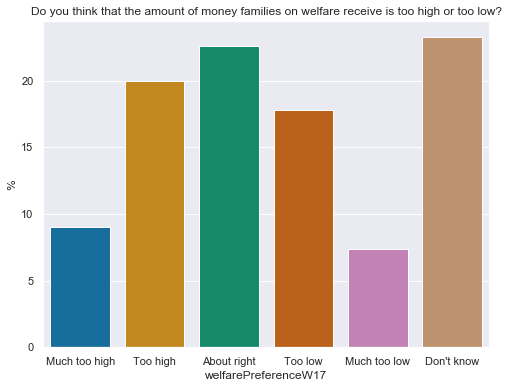

In [37]:
mask = welfare_pref.notnull()# & LAB2017

df = weighted_value_counts(welfare_pref[mask],
                      BES_Panel["wt_new_W19_result"][mask],
                      normalize=True,perc=True,).sort_index().round(2)["weighted_sample_percentage"]

# .plot(kind='bar');
plt.figure(figsize=(8,6))
sns.barplot(x=df.index,y=df.values);
plt.ylabel("%");
plt.title("Do you think that the amount of money families on welfare receive is too high or too low?");

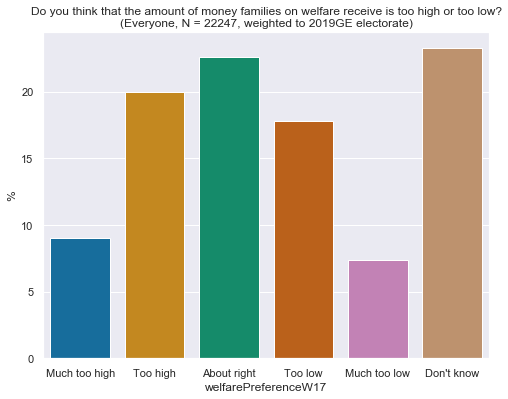

In [54]:
def weighted_welfare_bar_plot(mask, title_detail):
    df = weighted_value_counts(welfare_pref[mask],
                          BES_Panel["wt_new_W19_result"][mask],
                          normalize=True,perc=True,).sort_index().round(2)

    plt.figure(figsize=(8,6))
    sns.barplot(x=df.index,y=df["weighted_sample_percentage"]);
    plt.ylabel("%");
    plt.title("Do you think that the amount of money families on welfare receive is too high or too low?\n("+title_detail+", N = "+str(int(df["raw_sample_size"].sum()))+", weighted to 2019GE electorate)");
    return df

mask = welfare_pref.notnull()
title_detail = "Everyone"
df = weighted_welfare_bar_plot(mask,title_detail)

In [26]:
LAB2017 = BES_Panel["profile_past_vote_2017"]=="Labour"
LAB2019 = BES_Panel["pastvote_ge_2019W19"]=="Labour"
CON2019 = BES_Panel["pastvote_ge_2019W19"]=="Conservative"
LD2019 = BES_Panel["pastvote_ge_2019W19"]=="Liberal Democrat"
GP2019 = BES_Panel["pastvote_ge_2019W19"]=="Green"
BXP2019 = BES_Panel["pastvote_ge_2019W19"]=='Brexit Party'

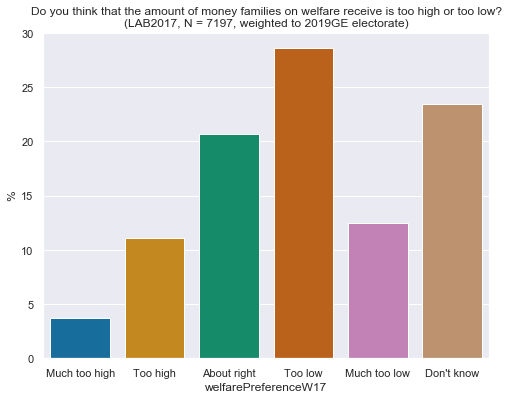

In [55]:
mask = welfare_pref.notnull() & LAB2017
title_detail = "LAB2017"
df = weighted_welfare_bar_plot(mask, title_detail)

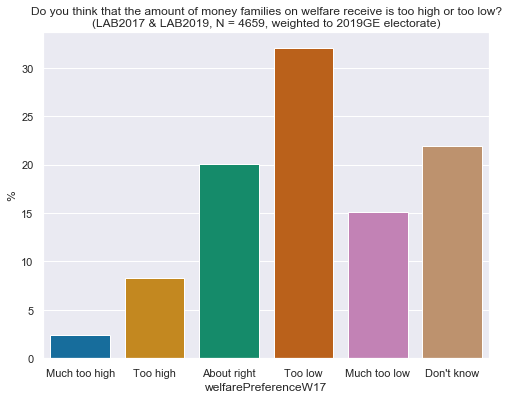

In [56]:
mask = welfare_pref.notnull() & LAB2017 & LAB2019
title_detail = "LAB2017 & LAB2019"
df = weighted_welfare_bar_plot(mask, title_detail)

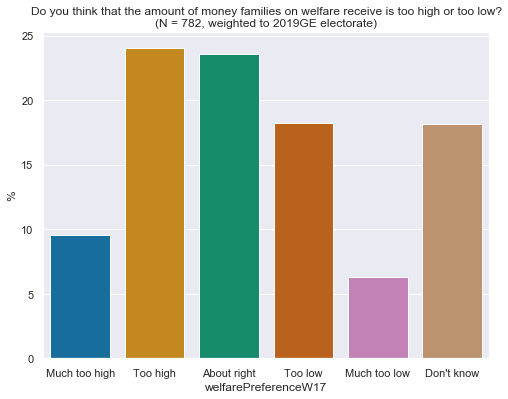

In [52]:
mask = welfare_pref.notnull() & LAB2017 & CON2019
title_detail = "LAB2017 & CON2019"
df = weighted_welfare_bar_plot(mask, title_detail)

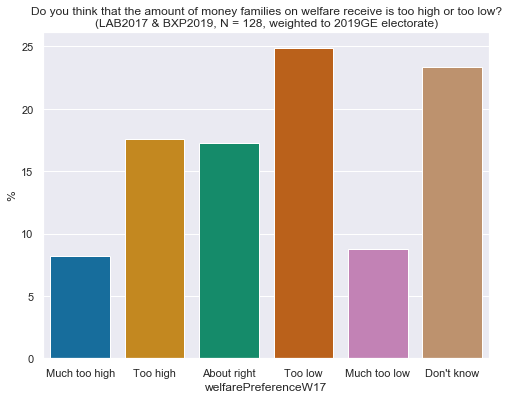

In [57]:
mask = welfare_pref.notnull() & LAB2017 & BXP2019
title_detail = "LAB2017 & BXP2019"
df = weighted_welfare_bar_plot(mask, title_detail)

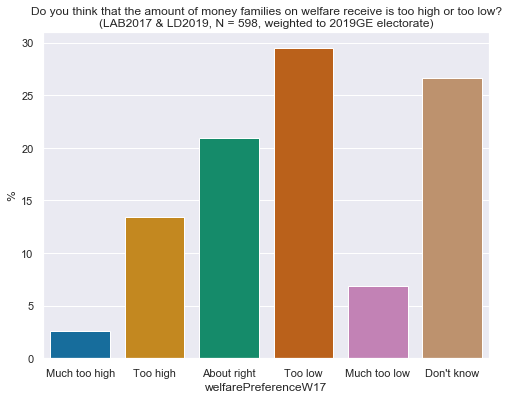

In [58]:
mask = welfare_pref.notnull() & LAB2017 & LD2019
title_detail = "LAB2017 & LD2019"
df = weighted_welfare_bar_plot(mask, title_detail)

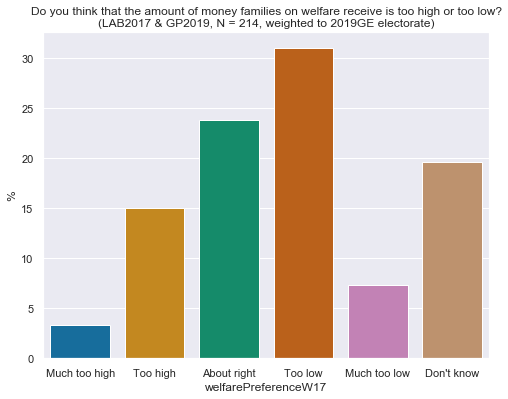

In [59]:
mask = welfare_pref.notnull() & LAB2017 & GP2019
title_detail = "LAB2017 & GP2019"
df = weighted_welfare_bar_plot(mask, title_detail)